In [13]:
import json

with open("MMLU/results.json", "r") as file:
    mmlu: dict = json.load(file)
with open("GSM8k/results.json", "r") as file:
    gsm8k: dict = json.load(file)
with open("MuSR/results.json", "r") as file:
    musr: dict = json.load(file)
with open("BBH/results.json", "r") as file:
    bbh: dict = json.load(file)
results = {
    "MMLU": mmlu,
    "GSM8k": gsm8k,
    "MuSR": musr,
    "BBH": bbh
}
results

{'MMLU': {'meta-llama/Llama-3.1-8B-Instruct': {'addition': 0.6734083463894032,
   'lexicon': 0.6826662868537245,
   'syntax': 0.6845890898732374,
   'our_baseline': 0.7028913260219342,
   'naive': 0.6786782509614016,
   'baseline': 0.7026776812419884,
   'typo': 0.6442814413901153,
   'scramble': 0.5267055974932345}},
 'GSM8k': {'meta-llama/Llama-3.1-8B-Instruct': {'addition': 0.7422289613343442,
   'lexicon': 0.6952236542835482,
   'syntax': 0.77710386656558,
   'naive': 0.8233510235026535,
   'baseline': 0.8036391205458681,
   'our_baseline': 0.8059135708870356,
   'typo': 0.733131159969674,
   'scramble': 0.6224412433661866,
   'typo_qwerty': 0.49052312357846856,
   'typo_doubling': 0.5094768764215315,
   'typo_deletion': 0.39423805913570886,
   'typo_hold_down': 0.4746019711902957,
   'typo_add_random': 0.621683093252464},
  'meta-llama/Meta-Llama-3-8B-Instruct': {'addition': 0.6618650492797574,
   'our_baseline': 0.7505686125852918,
   'lexicon': 0.6391205458680819,
   'syntax': 0

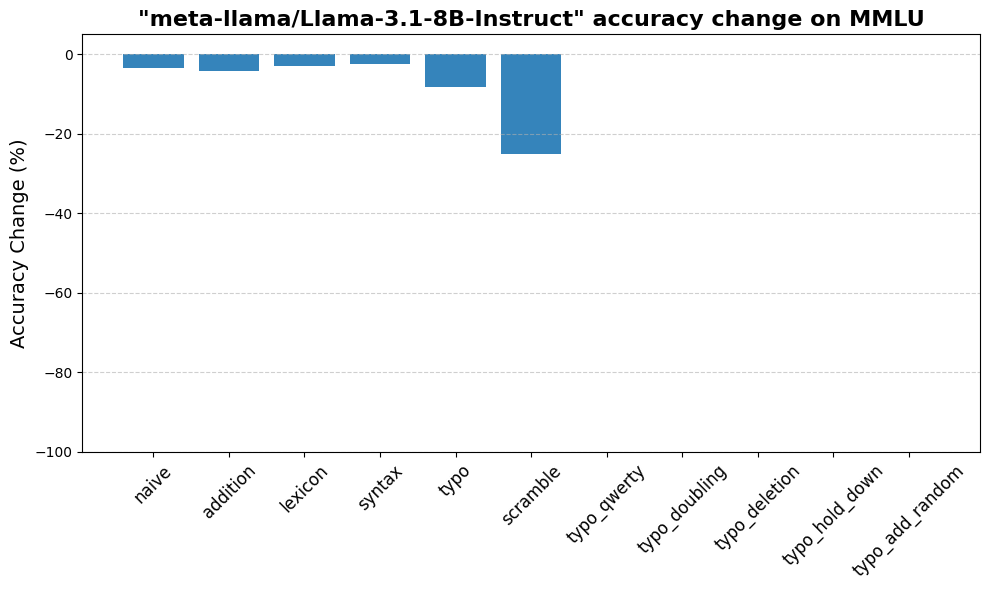

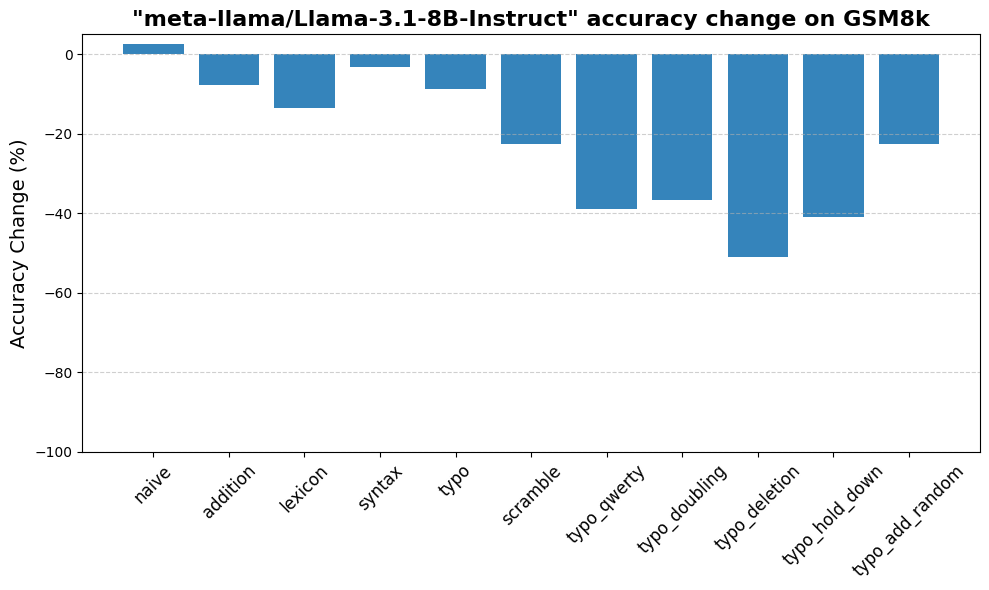

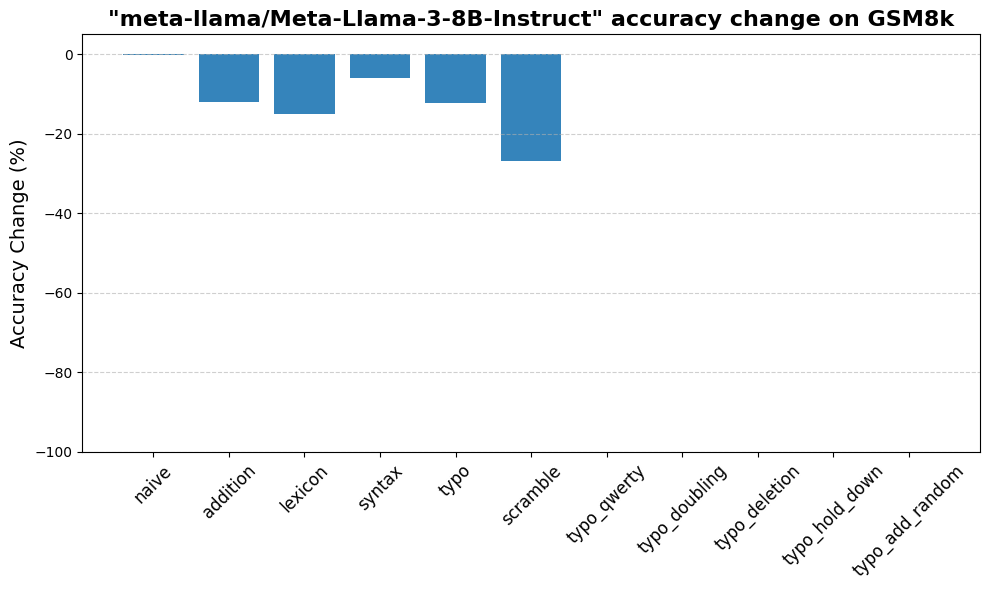

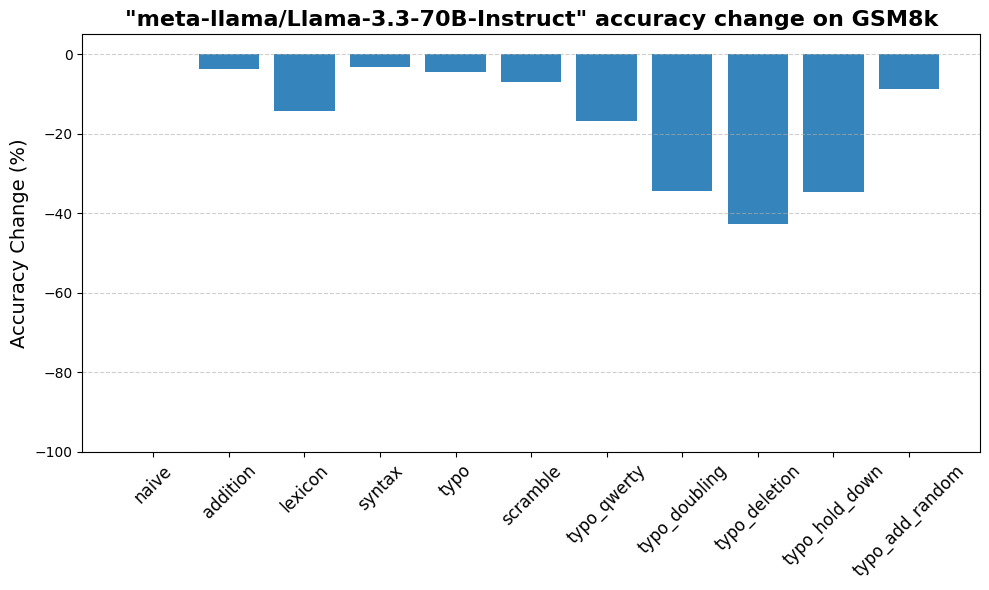

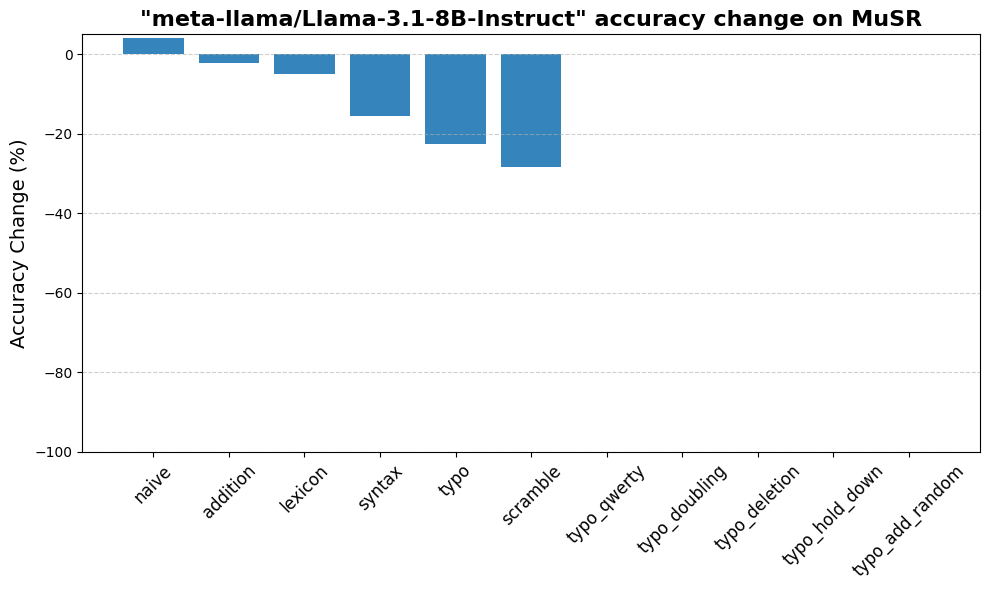

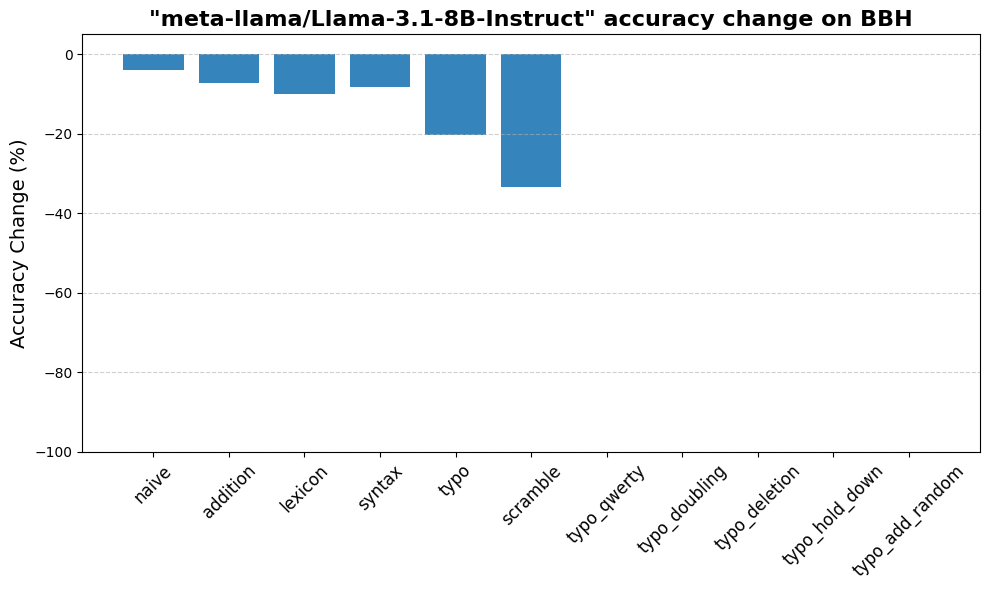

In [14]:
import numpy as np
import matplotlib.pyplot as plt

for dataset_name, model_results in results.items():
    for model, results in model_results.items():
        # Data
        #main_categories = ["naive", "addition", "lexicon", "syntax", "typo", "scramble",]
        main_categories = ["naive", "addition", "lexicon", "syntax", "typo", "scramble","typo_qwerty", 'typo_doubling',
    'typo_deletion',
    'typo_hold_down',
    'typo_add_random',]
        # Bar width settings
        bar_width = 0.8

        # Positions for main categories
        main_positions = np.arange(len(main_categories))

        # Create the plot
        fig, ax = plt.subplots(figsize=(10, 6))


        def get_scores():
            scores = []
            for category in main_categories:
                if category in results.keys():
                    scores.append(results[category])
                else:
                    scores.append(-999.0)
            return scores, results["baseline"] if "baseline" in results.keys() else results["our_baseline"]


        scores, baseline = get_scores()
        if baseline == 0.0: continue
        # Define a color palette using colormaps

        # Percent
        ax.bar(main_positions, [(1.0 - (score/baseline))*-100 if not score == -999.0 else 0.0 for score in scores], bar_width, label=main_categories, alpha=0.9)

        # Percent points
        #ax.bar(main_positions, [(score-baseline)*100 if not score == -999.0 else 0.0 for score in scores], bar_width, label=main_categories, alpha=0.9)

        # Customize x-axis
        ax.set_xticks(main_positions)
        ax.set_xticklabels(main_categories, fontsize=12, rotation=45)
        #ax.set_xlabel("Subset", fontsize=14)

        # Customize y-axis
        ax.set_ylabel("Accuracy Change (%)", fontsize=14)
        ax.set_ylim(-100, 5)  # Add some padding

        # Add title
        ax.set_title(f'"{model}" accuracy change on {dataset_name}', fontsize=16, fontweight="bold")

        # Add gridlines
        ax.grid(axis='y', linestyle='--', alpha=0.6)

        # Customize legend
        #ax.legend(title="Categories", fontsize=10, title_fontsize=12, loc="upper left", bbox_to_anchor=(1, 1))

        # Tight layout for better spacing
        plt.tight_layout()

        plt.show()
